In [1]:
import pandas as pd

In [2]:
df1=pd.read_excel("D:/amazonmining/amazon/detailsf4.xlsx")

In [3]:
df1=df1.dropna(how='all')

In [4]:
df1= df1.reset_index(drop=True)

In [5]:
df1['tokenized']=" "

In [6]:
len(df1.index)

40648

In [7]:
for item in range(0,40648):
    df1.tokenized.iloc[[item]]=item

In [8]:
df1

,name,BookName,reviewtitle,author,review,date,tokenized
0,Rahul Singh,Sita - Warrior of Mithila (Book 2- Ram Chandra...,The Sita You Were Never Aware Of.,Amish Tripathi,"For all our life , the perception made in our ...",on 4 July 2017,0
1,N_S,Sita - Warrior of Mithila (Book 2- Ram Chandra...,"It is OK, but the book seems laboured...",Amish Tripathi,"I am more than halfway through it, but it is n...",on 2 July 2017,1
2,K_men,Sita - Warrior of Mithila (Book 2- Ram Chandra...,A familiar speedy thriller,Amish Tripathi,The rating might not completely justify the st...,on 8 July 2017,2
3,Kalpesh M,Sita - Warrior of Mithila (Book 2- Ram Chandra...,better than this one,Amish Tripathi,Except for a few pages around the mid part of ...,on 3 July 2017,3
4,swamini,Sita - Warrior of Mithila (Book 2- Ram Chandra...,Binding if frigile,Amish Tripathi,I haven't read the book yet so no comments on ...,on 5 July 2017,4
5,Saptarshi T.,Sita - Warrior of Mithila (Book 2- Ram Chandra...,i was annoyed the way amish portrayed vali(lik...,Amish Tripathi,Just average.not a page turner.many mysteries ...,on 27 June 2017,5
6,POULOMI,Sita - Warrior of Mithila (Book 2- Ram Chandra...,"The book us good, the way the characters are t...",Amish Tripathi,"The book us good,the way the characters are tr...",on 19 June 2017,6
7,Hareesh M V,Sita - Warrior of Mithila (Book 2- Ram Chandra...,Amish Rocks Again,Amish Tripathi,Amish Rocks again. This time demystifying Sita...,on 9 July 2017,7
8,Bhaven,Sita - Warrior of Mithila (Book 2- Ram Chandra...,An interesting story of Sita,Amish Tripathi,A very unique portrayal of Sita as an independ...,on 28 June 2017,8
9,Avneesh Kumar,Train to Pakistan,A Book on Human Psyche and It's Pleasure in r...,Khushwant Singh,It was a book which leaves the reader utterly ...,on 3 February 2016,9


In [9]:
df1['reviewtokenized']=' '

In [10]:
new=[]

In [11]:
import nltk
import re
from nltk import sent_tokenize, word_tokenize, pos_tag
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import movie_reviews
from nltk.stem import PorterStemmer

In [12]:
def create_word_features(words):
    useful_words = [word for word in words if word not in stopwords.words("english")]
    my_dict = dict([(word, True) for word in useful_words])
    return my_dict

In [13]:
neg_reviews = []
for fileid in movie_reviews.fileids('neg'):
    words = movie_reviews.words(fileid)
    neg_reviews.append((create_word_features(words), "negative"))
print(len(neg_reviews))

1000


In [14]:
pos_reviews = []
for fileid in movie_reviews.fileids('pos'):
    words = movie_reviews.words(fileid)
    pos_reviews.append((create_word_features(words), "positive"))

In [15]:
train_set = neg_reviews[:950] + pos_reviews[:950]
test_set =  neg_reviews[950:] + pos_reviews[950:]
print(len(train_set),  len(test_set))

1900 100


In [16]:
classifier = NaiveBayesClassifier.train(train_set)

In [17]:
for rev,i in zip(df1.review,df1.tokenized):
    if isinstance(rev,str):
        k=word_tokenize(rev)
        words = create_word_features(k)
        df1.reviewtokenized.iloc[[i]]=classifier.classify(words)
    else:
        df1.reviewtokenized.iloc[[i]]="neutral"

In [27]:
df1['analyzed']=' '

In [28]:
for rev,i in zip(df1.reviewtokenized,df1.tokenized):
    if rev == "positive":
        df1.analyzed.iloc[[i]]=1
    elif rev == "negative":
        df1.analyzed.iloc[[i]]=2
    else:
        df1.analyzed.iloc[[i]]=3

In [20]:
df1

,name,BookName,reviewtitle,author,review,date,tokenized,reviewtokenized,analyzed
0,Rahul Singh,Sita - Warrior of Mithila (Book 2- Ram Chandra...,The Sita You Were Never Aware Of.,Amish Tripathi,"For all our life , the perception made in our ...",on 4 July 2017,0,positive,1
1,N_S,Sita - Warrior of Mithila (Book 2- Ram Chandra...,"It is OK, but the book seems laboured...",Amish Tripathi,"I am more than halfway through it, but it is n...",on 2 July 2017,1,negative,2
2,K_men,Sita - Warrior of Mithila (Book 2- Ram Chandra...,A familiar speedy thriller,Amish Tripathi,The rating might not completely justify the st...,on 8 July 2017,2,positive,1
3,Kalpesh M,Sita - Warrior of Mithila (Book 2- Ram Chandra...,better than this one,Amish Tripathi,Except for a few pages around the mid part of ...,on 3 July 2017,3,positive,1
4,swamini,Sita - Warrior of Mithila (Book 2- Ram Chandra...,Binding if frigile,Amish Tripathi,I haven't read the book yet so no comments on ...,on 5 July 2017,4,positive,1
5,Saptarshi T.,Sita - Warrior of Mithila (Book 2- Ram Chandra...,i was annoyed the way amish portrayed vali(lik...,Amish Tripathi,Just average.not a page turner.many mysteries ...,on 27 June 2017,5,positive,1
6,POULOMI,Sita - Warrior of Mithila (Book 2- Ram Chandra...,"The book us good, the way the characters are t...",Amish Tripathi,"The book us good,the way the characters are tr...",on 19 June 2017,6,positive,1
7,Hareesh M V,Sita - Warrior of Mithila (Book 2- Ram Chandra...,Amish Rocks Again,Amish Tripathi,Amish Rocks again. This time demystifying Sita...,on 9 July 2017,7,positive,1
8,Bhaven,Sita - Warrior of Mithila (Book 2- Ram Chandra...,An interesting story of Sita,Amish Tripathi,A very unique portrayal of Sita as an independ...,on 28 June 2017,8,positive,1
9,Avneesh Kumar,Train to Pakistan,A Book on Human Psyche and It's Pleasure in r...,Khushwant Singh,It was a book which leaves the reader utterly ...,on 3 February 2016,9,positive,1


In [21]:
df1['titleanalyzed']=' '

In [22]:
df1['titletokenized']=' '

In [23]:
for rev,i in zip(df1.reviewtitle,df1.tokenized):
    if isinstance(rev,str):
        k=word_tokenize(rev)
        words = create_word_features(k)
        m=classifier.classify(words)
        df1.titletokenized.iloc[[i]]=m
        if m == "positive":
            df1.titleanalyzed.iloc[[i]]=1
        else:
            df1.titleanalyzed.iloc[[i]]=2
    else:
        df1.titletokenized.iloc[[i]]="neutral"
        df1.titleanalyzed.iloc[[i]]=3

In [24]:
df1.to_csv(path_or_buf="D:/amazonmining/amazon/analyzeddatafinall.csv",sep='\t')

In [25]:
import matplotlib.pyplot as mlt
import seaborn as sns
import plotly.plotly as pyt
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

In [26]:
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

# PIE CHART DISPLAYING POSITIVE,NEGATIVE AND NEUTRAL REVIEWS

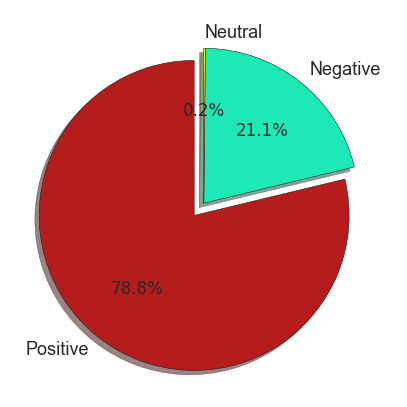

In [206]:
rev=df1['reviewtokenized']
labels=['Positive','Negative','Neutral']
data=list(rev.value_counts())
import matplotlib as mpl
mpl.rcParams['font.size'] = 12.0
mlt.pie(data,labels=labels,startangle=90,shadow=True,explode=(0.1,0,0),autopct='%1.1f%%',colors=['#B71C1C', '#1DE9B6','#FFFF00'])
fig = mlt.gcf()
fig.set_size_inches(5,5)
mlt.show()

# MOST REVIEWED BOOKS

In [28]:
booksOnly=df1.groupby(by='BookName').count()['tokenized'].reset_index()

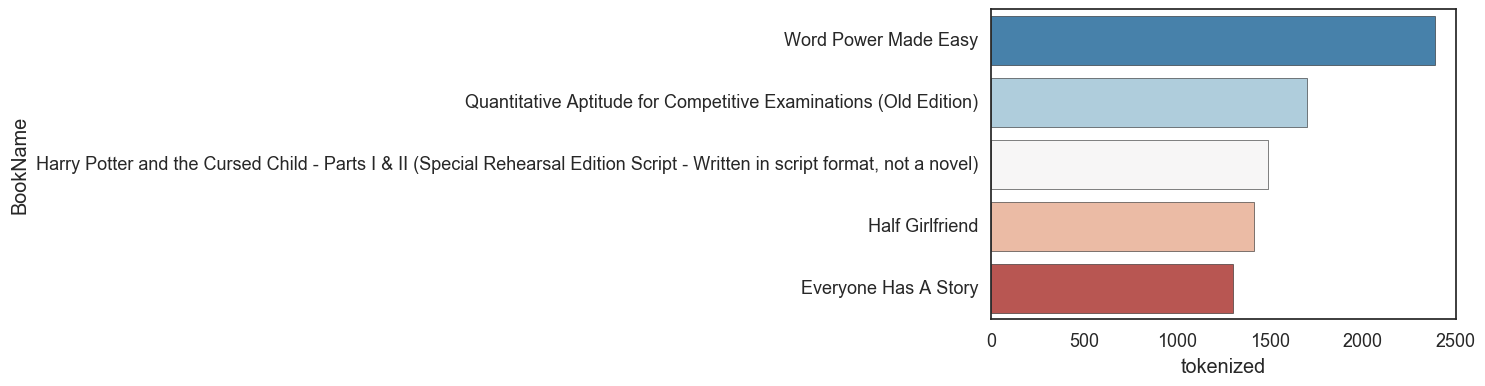

In [198]:
# mlt.subplots(figsize=(10,5))
booksOnly.sort_values(by='tokenized',inplace=True,ascending=False)
sns.set(style="white", context="talk")
ax=sns.barplot(x='tokenized',y='BookName',data=booksOnly.head(),palette="RdBu_r")
#sns.set_color_codes(palette="muted")
mlt.show()

# LEAST REVIEWED BOOKS

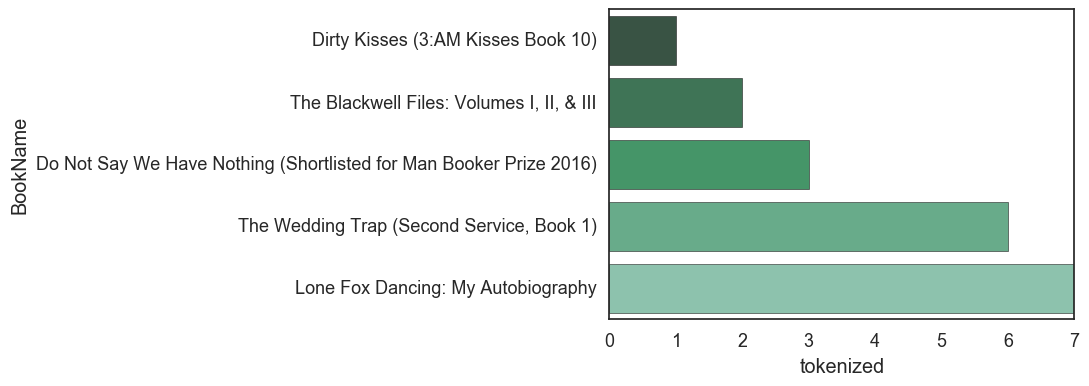

In [197]:
booksOnly.sort_values(by='tokenized',inplace=True)
sns.set(style="white", context="talk")
ax=sns.barplot(x='tokenized',y='BookName',data=booksOnly.head(),palette="BuGn_d")
#sns.set_palette("Set1", 8, 0.75)
mlt.show()

# TOTAL NO. OF AUTHORS

In [31]:
authorwise=df1.groupby(by=['author','analyzed'])

In [32]:
len(authorwise)

257

# MOST REVIEWED AUTHORS

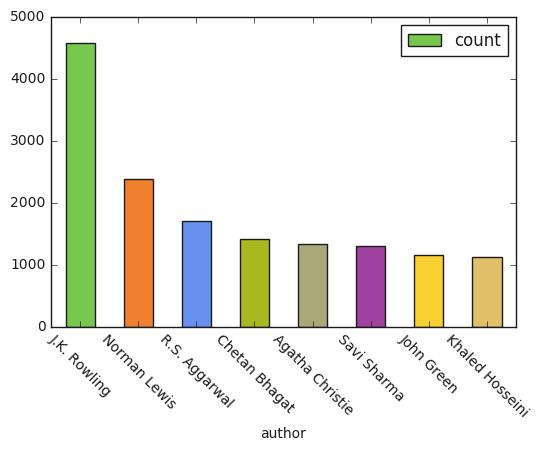

In [33]:
authordf=df1.groupby(by='author')
authordf=authordf.count()['tokenized'].reset_index()
authordf.columns=['author','count']
authordf.sort_values(inplace=True,by='count',ascending=False)
authordf.reset_index()
ax=authordf.head(8).plot.bar(x='author',color=pkmn_type_colors)
mlt.xticks(rotation=-45)
mlt.show()

# Contradictory Reviews

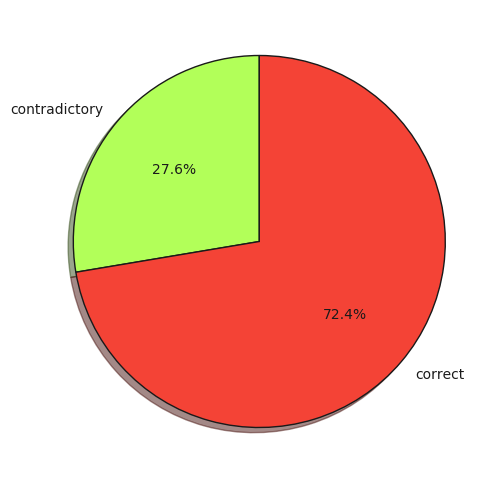

In [34]:
df=df1[df1['analyzed'] !=df1['titleanalyzed']]
slices=[len(df),(len(df1)-len(df))]
labels=['contradictory','correct']
mlt.pie(slices,labels=labels,startangle=90,shadow=True,explode=(0,0),autopct='%1.1f%%',colors=['#B2FF59','#F44336'])
fig = mlt.gcf()
fig.set_size_inches(6,6)
mlt.show()

# LETS SEE THIS IN VIOLIN PLOT

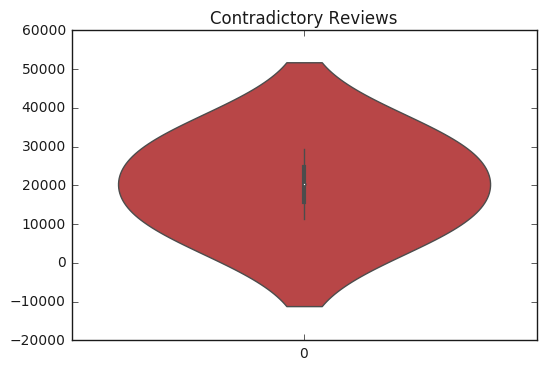

In [35]:
df=df1[df1['analyzed'] !=df1['titleanalyzed']]
slices=[len(df),(len(df1)-len(df))]
sns.violinplot(data=slices).set_title('Contradictory Reviews')
mlt.show()

# Author with most Positive Reviews

In [36]:
revname=df1.sort_values(by='author')
authdf=revname[revname['analyzed'] == 1]

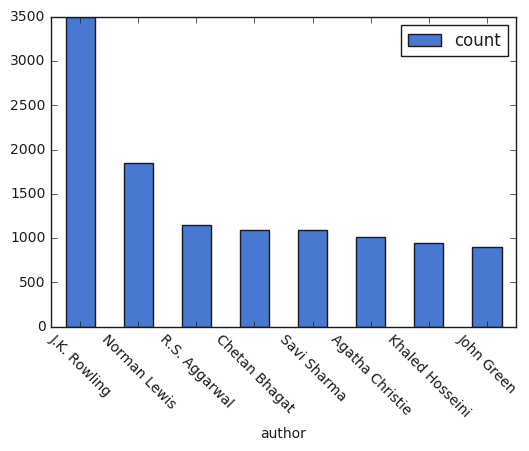

In [37]:
adf=authdf.groupby(by='author')
adf=adf.count()['tokenized'].reset_index()
adf.columns=['author','count']
adf.sort_values(inplace=True,by='count',ascending=False)
adf.reset_index()
ax=adf.head(8).plot.bar(x='author',color='b')
mlt.xticks(rotation=-45)
mlt.show()

# INTERACTVE GRAPH FOR THE SAME DATA

In [38]:
trace1 = go.Bar(
    x=adf.author,
    y=adf.count,
    name='Author With Most Postive Reviews'
)
data = [
    go.Bar(
        x=adf['author'].head(8), # assign x as the dataframe column 'x'
        y=adf['count'].head(8),
        marker = dict(
            line = dict(
            color = 'rgba(90, 21, 80, 1.0)',
            width = 3)
     )
   )      
]
layout = go.Layout(title="Author With The Most Positive Reviews")
fig = go.Figure(data=data,layout=layout)
py.plot(fig, filename='barpos.html')

'file://C:\\Users\\MAHE\\barpos.html'

# Author with most Negative Reviews

In [39]:
revn=df1.sort_values(by='author')
audf=revn[revn['analyzed'] == 2]

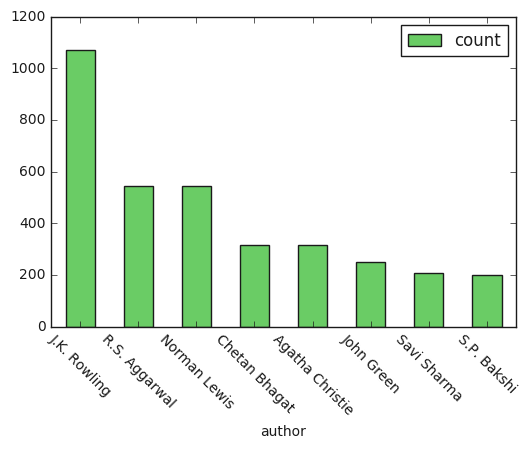

In [40]:
adff=audf.groupby(by='author')
adff=adff.count()['tokenized'].reset_index()
adff.columns=['author','count']
adff.sort_values(inplace=True,by='count',ascending=False)
adff.reset_index()
ax=adff.head(8).plot.bar(x='author',color='g')
mlt.xticks(rotation=-45)
mlt.show()

- So, these are the authors getting most negative reviews on amazon,
- With J.K Rowling leading,
  Probably, J.K Rowling was equally liked and unliked by the customers.
  He is the most reviewed author on amazon,
  with most negative and most positive reviews.
  

# INTERACTVE GRAPH FOR THE SAME DATA

In [41]:
trace1 = go.Bar(
    x=adff.author,
    y=adff.count,
    name='Negative Reviews'
)
data = [
    go.Bar(
        x=adff['author'].head(8), # assign x as the dataframe column 'x'
        y=adff['count'].head(8),
        marker = dict(
        color = 'rgba(255,153, 0, 0.6)',
        line = dict(
            color = 'rgba(90, 21, 80, 1.0)',
            width = 3)
    )
   )     
]
layout = go.Layout(title="Author With The Most Negative Reviews")
fig = go.Figure(data=data,layout=layout)
py.plot(fig, filename='barneg.html')

'file://C:\\Users\\MAHE\\barneg.html'

In [42]:
df1['year']=' '

In [43]:
for i,dt in zip(df1.tokenized,df1.date):
    l=dt[-4:]
    df1.year.iloc[[i]]=int(l)

In [44]:
groupyear=df1.groupby(by='year').count()['tokenized'].reset_index()
groupyear.sort_values(by='year',inplace=True)

In [45]:
groupyear.columns=['year','count']

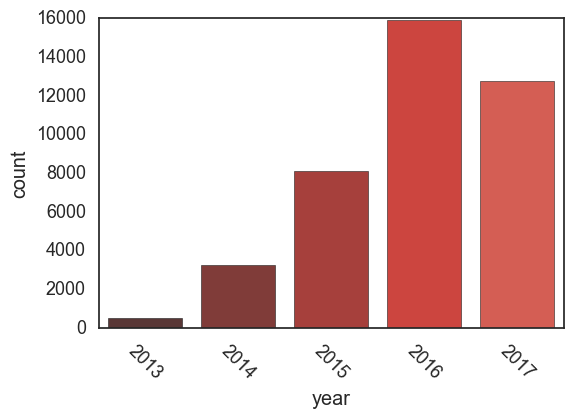

In [82]:
sns.axes_style(style='darkgrid')
sns.set(style="white", context="talk")
sns.barplot(groupyear['year'],groupyear['count'],palette=sns.color_palette("Reds_d", n_colors=7, desat=1))
mlt.xticks(rotation=-45)
mlt.show()

- The number of reviews on Amazon has grown over the years.
- Thus, also we can estimate by this that the amazon customers are increasing rapidly, over the years

# WORD COUNT

In [47]:
list1=[]

In [48]:
for revv in df1.review:
    if isinstance(revv,str):
        k=word_tokenize(revv)
        words = create_word_features(k)
        for m in words:
            list1.append(m)

In [115]:
from collections import Counter
import string
list1 = [''.join(c for c in s if c not in string.punctuation) for s in list1]
list1 = [s for s in list1 if s]
counts = Counter(list1)
counts=dict(counts)
countdf=pd.DataFrame(data =list(counts.items()), columns=['word', 'total'])


D:\anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



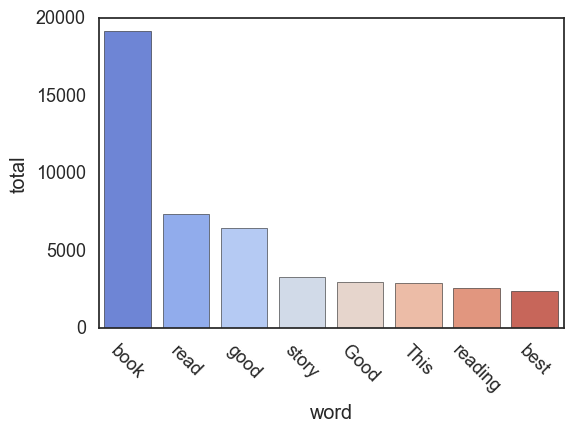

In [116]:
cdf=countdf[countdf['word'].map(len) > 3]
cdf.sort_values(by='total',ascending=False,inplace=True)
cdf.reset_index()
sns.axes_style(style='darkgrid')
sns.set(style="white", context="talk")
sns.barplot(cdf['word'].head(8),cdf['total'].head(8),palette='coolwarm')
mlt.xticks(rotation=-45)
mlt.show()

- These are the most frequent words in the reviews of amazon books.

- Thus,we can also conclude by this data that, the most common words in the reviews will be related on the category it belongs to.

In [152]:
str1 = ' '.join(str(e) for e in list1)
print(len(str1))

2766487


In [181]:
from os import path
from wordcloud import WordCloud
from PIL import Image
import numpy as np

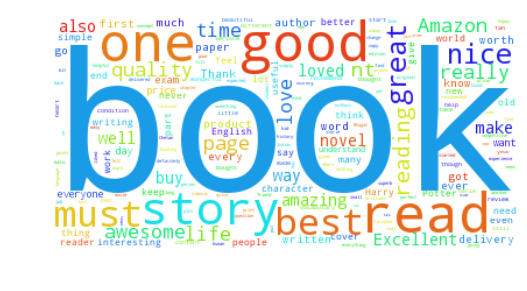

In [193]:
wordcloud = WordCloud(background_color="white", max_words=2766487).generate(str1)
mlt.imshow(wordcloud, interpolation='bilinear')
mlt.axis("off")
mlt.show()

# How does the word count of reviews affect their positivity and negativity?

In [52]:
df1['reviewlength']=' '

In [53]:
for i,revv in zip(df1.tokenized,df1.review):
    if isinstance(revv,str):
        k=word_tokenize(revv)
        df1.reviewlength.iloc[[i]]=len(k)
    else:
        df1.reviewlength.iloc[[i]]=0

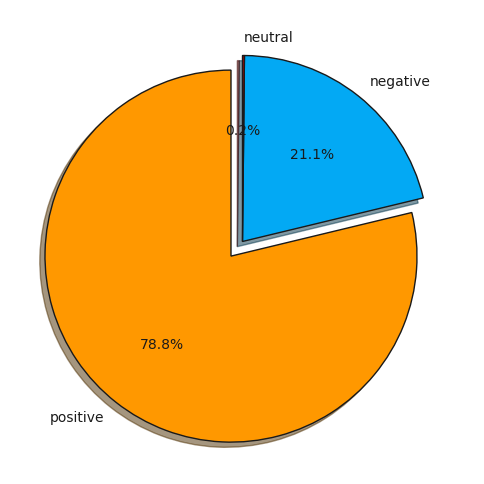

In [70]:
ddf=df1.groupby(by='reviewtokenized').count()['reviewlength'].reset_index()
ddf.columns=['review','length']
ddf.sort_values(inplace=True,by='length',ascending=False)
ddf.reset_index()
mlt.pie(x=ddf['length'],labels=ddf['review'],shadow=True,explode=[0.1,0,0],startangle=90,autopct='%1.1f%%',colors=['#FF9800','#03A9F4','#D50000'])
fig = mlt.gcf()
fig.set_size_inches(6,6)
mlt.show()

- People giving positive reviews on amazon have usually more characters in their reviews as compared to people giving negative reviews

- So, if  you are writing a long review for any of the amazon products, it may be probably be a positive one

# Common Reviewers

In [215]:
cr=df1['name']
x=cr.values
list2=[]
for i in x:
    if isinstance(i,str):
        i=i.lower()
        list2.append(i)
list2.sort()

In [216]:
from collections import Counter
import string
list2 = [''.join(c for c in s if c not in string.punctuation) for s in list2]
list2 = [s for s in list2 if s]
cnts = Counter(list2)
cnts=dict(cnts)
cntdf=pd.DataFrame(data =list(cnts.items()), columns=['name', 'count'])

# More Common Reviewer's Names 

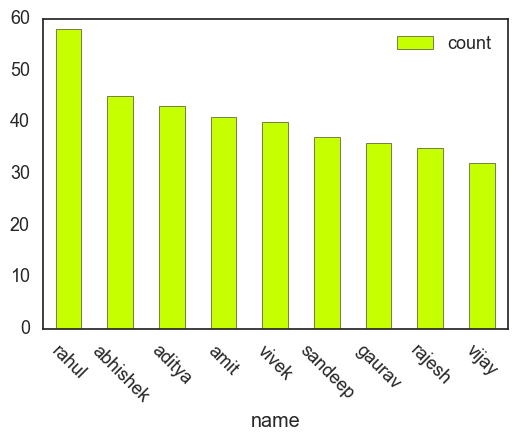

In [217]:
cntdf.sort_values(by='count',ascending=False,inplace=True)
cntdf.reset_index()
ax=cntdf.iloc[[2,3,4,5,6,7,8,9,10]].plot.bar(x='name',color='#C6FF00')
mlt.xticks(rotation=-45)
mlt.show()

- As we can conclude , if your name is one of the following , then you might end up reviewing a book on amazon.

In [223]:
d = path.dirname('MAHE')
alice_mask = np.array(Image.open(path.join(d, "alice_mask.jpg")))

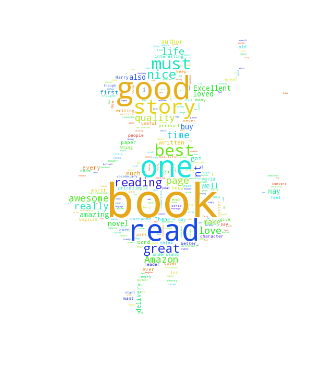

In [227]:
wordcloud = WordCloud(background_color="white", max_words=2000,mask=alice_mask).generate(str1)
mlt.imshow(wordcloud, interpolation='bilinear')
mlt.axis("off")
mlt.show()